# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import requests
import certifi
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

today = date.today()
# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
calls =[]
for city in cities:
    base_url = 'https://api.openweathermap.org/'
    call = (f'{base_url}data/2.5/weather?q={city}&appid={api_key}')
    calls.append(call)
print(calls[0])

https://api.openweathermap.org/data/2.5/weather?q=hurricane&appid=712fa8159f91ca4d523428765a9767cf


In [4]:
df = pd.DataFrame()
for call in calls:  #call = https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}
    try:
        data = requests.get(call).json()
        name = data['name']
        data_id = data['id']
        data = pd.json_normalize(data)
        df = df.append(data)
        print(f'City: {name} | City #: {data_id}')
    except:
        print(f'could not download: {call}')
df.to_csv('output_data/raw_weather_data.csv', index = False, header=True)
print('Dataframe Created.')

City: Hurricane | City #: 5540831
City: Busselton | City #: 2075265
City: Vestmanna | City #: 2610343
City: East Wenatchee Bench | City #: 5793272
City: Mazyr | City #: 625324
City: Najrān | City #: 103630
City: Hobart | City #: 2163355
City: Bluff | City #: 2206939
City: Lakhnādon | City #: 1265233
City: Meulaboh | City #: 1214488
City: Umluj | City #: 100926
City: Safi | City #: 2537881
City: Punta Arenas | City #: 3874787
City: Vasilevo | City #: 784700
City: Santa Teresa del Tuy | City #: 3627047
City: Vryburg | City #: 942511
could not download: https://api.openweathermap.org/data/2.5/weather?q=belushya guba&appid=712fa8159f91ca4d523428765a9767cf
City: Kota Tinggi | City #: 1732738
could not download: https://api.openweathermap.org/data/2.5/weather?q=potgietersrus&appid=712fa8159f91ca4d523428765a9767cf
City: Hambantota | City #: 1244926
City: Doka | City #: 376332
City: Vaini | City #: 4032243
could not download: https://api.openweathermap.org/data/2.5/weather?q=vaitupu&appid=712f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df.head()

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset,wind.gust,rain.1h,main.sea_level,main.grnd_level,snow.1h
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000,1612698799,-25200,5540831,Hurricane,200,-113.2899,37.1753,...,1.0,3373.0,US,1612708219,1612746263,NaN,NaN,NaN,NaN,NaN
0,"[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,5617,1612698799,28800,2075265,Busselton,200,115.3333,-33.6500,...,3.0,2008303.0,AU,1612647991,1612696747,2.68,0.53,NaN,NaN,NaN
0,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1612698800,0,2610343,Vestmanna,200,-7.1664,62.1564,...,1.0,1596.0,FO,1612687109,1612716432,NaN,NaN,NaN,NaN,NaN
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000,1612698800,-28800,5793272,East Wenatchee Bench,200,-120.2812,47.4257,...,1.0,3917.0,US,1612711110,1612746728,NaN,NaN,NaN,NaN,NaN
0,"[{'id': 802, 'main': 'Clouds', 'description': ...",stations,10000,1612698800,10800,625324,Mazyr,200,29.2456,52.0495,...,NaN,NaN,BY,1612675991,1612710072,NaN,NaN,1023.0,1004.0,NaN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid = df.loc[df['main.humidity']>100]
print(len(humid))

0


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

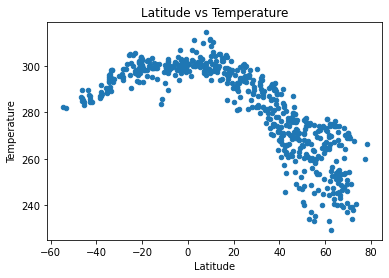

In [9]:
lat = 'coord.lat'
temp = 'main.temp'
tem =df.plot.scatter(lat,temp)
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = tem.get_figure()
fig.savefig(f"output_data/Latitude-vs-Temperature-{today}.png")

## Latitude vs. Humidity Plot

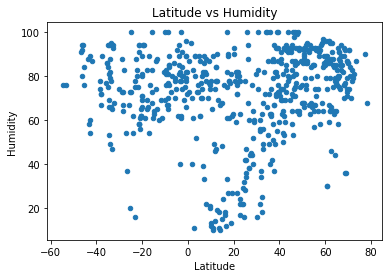

In [10]:
humidity = 'main.humidity'
hum = df.plot.scatter(lat,humidity)
hum.set_xlabel("Latitude")
hum.set_ylabel("Humidity")
hum.set_title('Latitude vs Humidity')
fig = hum.get_figure()
fig.savefig(f"output_data/Latitude-vs-Humidity-{today}.png")

## Latitude vs. Cloudiness Plot

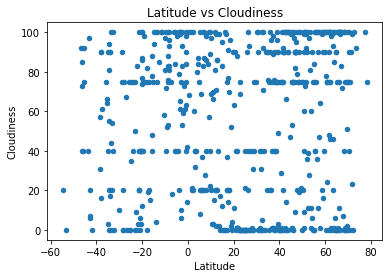

In [11]:
cloudiness = 'clouds.all'
cl = df.plot.scatter(lat,cloudiness)
cl.set_xlabel("Latitude")
cl.set_ylabel("Cloudiness")
cl.set_title('Latitude vs Cloudiness')
fig = cl.get_figure()
fig.savefig(f"output_data/Latitude-vs-Cloudiness-{today}.png")

## Latitude vs. Wind Speed Plot

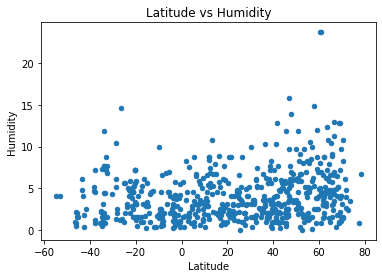

In [12]:
wind_speed = 'wind.speed'
w = df.plot.scatter(lat,wind_speed)
w.set_xlabel("Latitude")
w.set_ylabel("Humidity")
w.set_title('Latitude vs Humidity')
fig = w.get_figure()
fig.savefig(f"output_data/Latitude-vs-Wind-Speed-{today}.png")

## Linear Regression

In [13]:
n = df.loc[df['coord.lat'] > 0]
s = df.loc[df['coord.lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

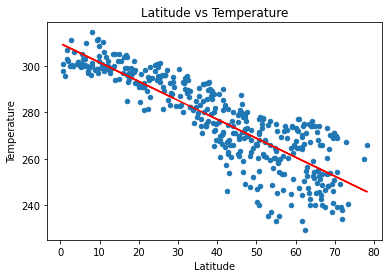

In [14]:
lat = 'coord.lat'
temp = 'main.temp_max'
(slope, intercept, rvalue, pvalue, stderr) = linregress(n[lat], n[temp])
regress_values = n[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = n.plot.scatter(lat,temp)
plt.plot(n[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = w.get_figure()
fig.savefig(f"output_data/NH-Latitude-vs-Max-Temp-{today}.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

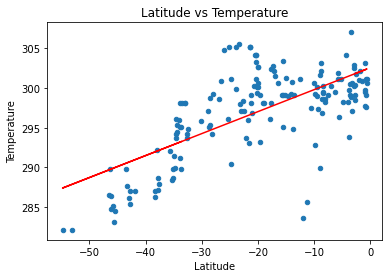

In [15]:
lat = 'coord.lat'
temp = 'main.temp_max'
(slope, intercept, rvalue, pvalue, stderr) = linregress(s[lat], s[temp])
regress_values = s[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = s.plot.scatter(lat,temp)
plt.plot(s[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = w.get_figure()
fig.savefig(f"output_data/SH-Latitude-vs-Max-Temp-{today}.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

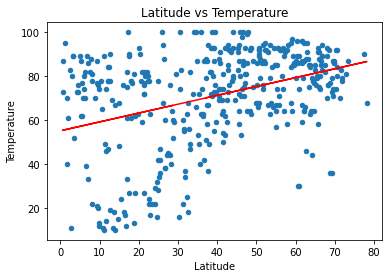

In [16]:
lat = 'coord.lat'
humidity = 'main.humidity'
(slope, intercept, rvalue, pvalue, stderr) = linregress(n[lat], n[humidity])
regress_values = n[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = n.plot.scatter(lat,humidity)
plt.plot(n[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = w.get_figure()
fig.savefig(f"output_data/NH-Latitude-vs-Humidity-{today}.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

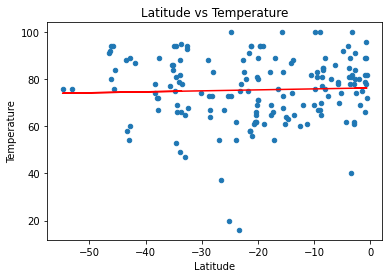

In [17]:
lat = 'coord.lat'
humidity = 'main.humidity'
(slope, intercept, rvalue, pvalue, stderr) = linregress(s[lat], s[humidity])
regress_values = s[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = s.plot.scatter(lat,humidity)
plt.plot(s[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = w.get_figure()
fig.savefig(f"output_data/SH-Latitude-vs-Humidity-{today}.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

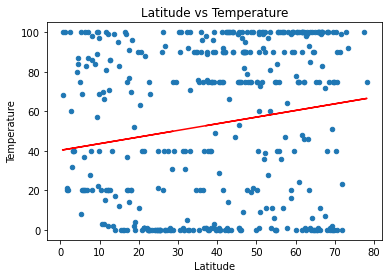

In [18]:
lat = 'coord.lat'
cloudiness = 'clouds.all'
(slope, intercept, rvalue, pvalue, stderr) = linregress(n[lat], n[cloudiness])
regress_values = n[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = n.plot.scatter(lat,cloudiness)
plt.plot(n[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = w.get_figure()
fig.savefig(f"output_data/NH-Latitude-vs-Cloudiness-{today}.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

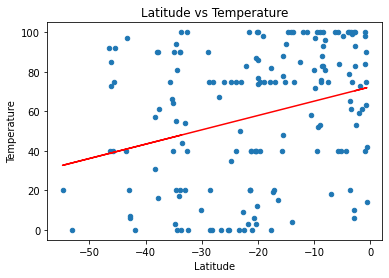

In [19]:
lat = 'coord.lat'
temp = 'main.temp_max'
(slope, intercept, rvalue, pvalue, stderr) = linregress(s[lat], s[cloudiness])
regress_values = s[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = s.plot.scatter(lat,cloudiness)
plt.plot(s[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = tem.get_figure()
fig.savefig(f"output_data/SH-Latitude-vs-Cloudiness-{today}.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

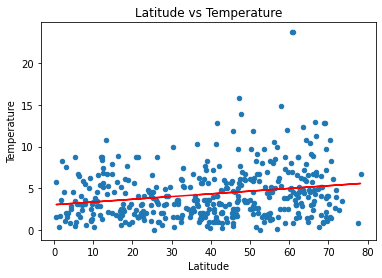

In [20]:
lat = 'coord.lat'
wind_speed = 'wind.speed'
(slope, intercept, rvalue, pvalue, stderr) = linregress(n[lat], n[wind_speed])
regress_values = n[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = n.plot.scatter(lat,wind_speed)
plt.plot(n[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = tem.get_figure()
fig.savefig(f"output_data/NH-Latitude-vs-Wind-Speed-{today}.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

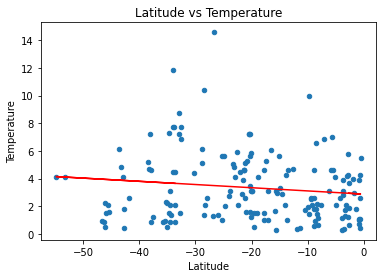

In [21]:
lat = 'coord.lat'
wind_speed = 'wind.speed'
(slope, intercept, rvalue, pvalue, stderr) = linregress(s[lat], s[wind_speed])
regress_values = s[lat] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tem = s.plot.scatter(lat,wind_speed)
plt.plot(s[lat],regress_values,"r-")
tem.set_xlabel("Latitude")
tem.set_ylabel("Temperature")
tem.set_title('Latitude vs Temperature')
fig = tem.get_figure()
fig.savefig(f"output_data/SH-Latitude-vs-Wind-Speed-{today}.png")